In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from pyod.models.iforest import IForest
from pyod.models.ocsvm import OCSVM
from pyod.models.abod import ABOD
from pyod.models.gmm import GMM
from pyod.models.knn import KNN
from pyod.models.pca import PCA
from pyod.models.inne import INNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


In [41]:
data = pd.read_csv('./Machine-Learning/Data/creditcard.zip')
X, ground_truth = data.drop('Class', axis = 1).copy(), data['Class']
ground_truth.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [4]:
contamination = 492/284315
RANDOM_STATE = 42

In [5]:
X.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
dtype: int64

In [6]:
X.isnull().sum().sum()

0

In [7]:
target_1_indices = np.where(ground_truth == 1)[0]
other_indices = np.where(ground_truth != 1)[0]

if len(other_indices) > 3000:
    other_indices = np.random.choice(other_indices, 3000, replace=False)

selected_indices = np.concatenate([target_1_indices, other_indices])


X_selected = X.loc[selected_indices]
y_selected = ground_truth.loc[selected_indices]

Видно что фрод в большинстве своем образует класетры

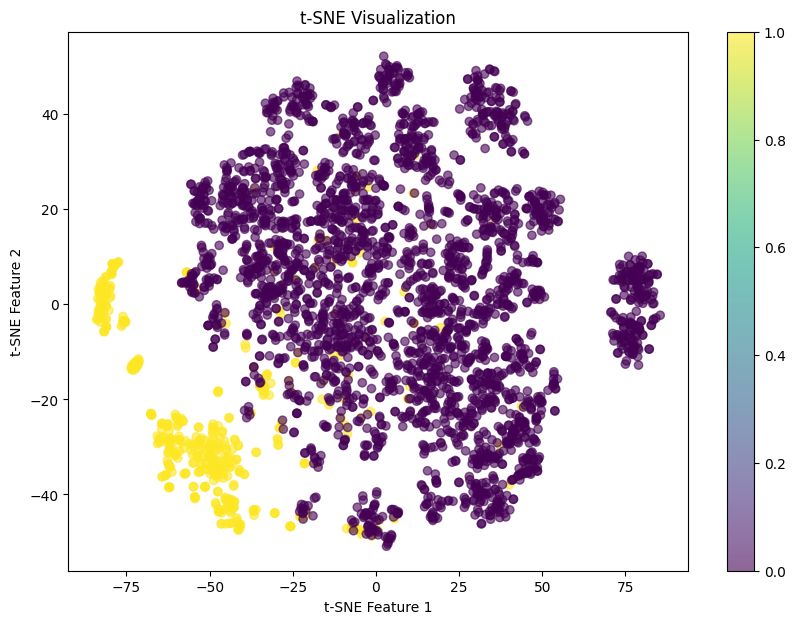

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_selected, alpha=0.6)
plt.colorbar()
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

In [10]:
classifiers = {
    'Isolation Forest': IForest(contamination=contamination,
                                random_state=RANDOM_STATE),
    'OCSVM': GMM(
        contamination=contamination),
    'INNE': INNE(
        contamination=contamination),
    'KNN': KNN(contamination=contamination, n_jobs=-1),
    'PCA': PCA(contamination=contamination),
}

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, ground_truth, test_size=0.25, random_state=RANDOM_STATE)

In [12]:
res = {key: -1 for key in classifiers}


for model in classifiers.keys():
    classifiers[model].fit(X_train)
    y_pred = classifiers[model].decision_function(X_test)
    res[model] = 2 *roc_auc_score(y_test, y_pred) - 1
    print(model)

c:\Users\USER\Desktop\код\dz_shad\antifrod\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


Isolation Forest


c:\Users\USER\Desktop\код\dz_shad\antifrod\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianMixture was fitted without feature names
  warnings.warn(


OCSVM
INNE
KNN
PCA


In [39]:
models_gini = pd.DataFrame({"model": list(res.keys()), "gini": list(res.values())})
models_gini

,model,gini
0,Isolation Forest,0.914807
1,OCSVM,0.921071
2,INNE,0.090487
3,KNN,0.553653
4,PCA,0.923059
